## Coursera/IBM Supervised Learning: Classification
### Kaggle Dataset (https://www.kaggle.com/andrewmvd/fetal-health-classification)

**Context:**
   * Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
   * The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

   * Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

   * In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

**Data:**
* This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
    * 1 = Normal
    * 2 = Suspect
    * 3 = Pathological

**Citation**
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)

**Questions to answer:**   
   * Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.
   * Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
   * Brief summary of data exploration and actions taken for data cleaning and feature engineering.
   * Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.
   * A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.
   * Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.
   * Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

### Import Libraries/Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, recall_score, make_scorer, roc_curve, roc_auc_score

import itertools

import imblearn
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance, plot_tree

import shap

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, DiscriminationThreshold
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC

from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### EDA

In [5]:
normal = df[df['fetal_health'] == 1]['fetal_health'].count()
suspect = df[df['fetal_health'] == 2]['fetal_health'].count()
pathological = df[df['fetal_health'] == 3]['fetal_health'].count()

print(df['fetal_health'].value_counts())

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


Text(0, 0.5, 'Percent of Cases per Rating')

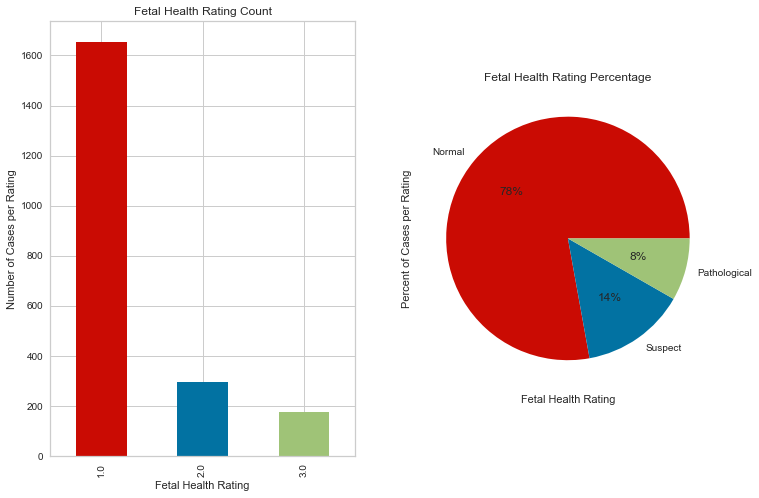

In [6]:
# Barplot and Piechart to visual Fetal Health Rating counts
plt.figure(figsize = (12,8))
plt.subplot(121)

df_visual_bar = df.fetal_health.value_counts().plot(
    figsize=(12, 8), kind='bar', color = ['r', 'b', 'g'])
plt.title('Fetal Health Rating Count')
plt.xlabel('Fetal Health Rating')
plt.ylabel('Number of Cases per Rating')


plt.subplot(122)
plt.title('Fetal State') 

df_visual_pie = plt.pie(
    [normal, suspect, pathological], labels=[
    'Normal', 'Suspect', 'Pathological'], colors = ['r', 'b', 'g'], autopct='%1.0f%%')
plt.title('Fetal Health Rating Percentage')
plt.xlabel('Fetal Health Rating')
plt.ylabel('Percent of Cases per Rating')

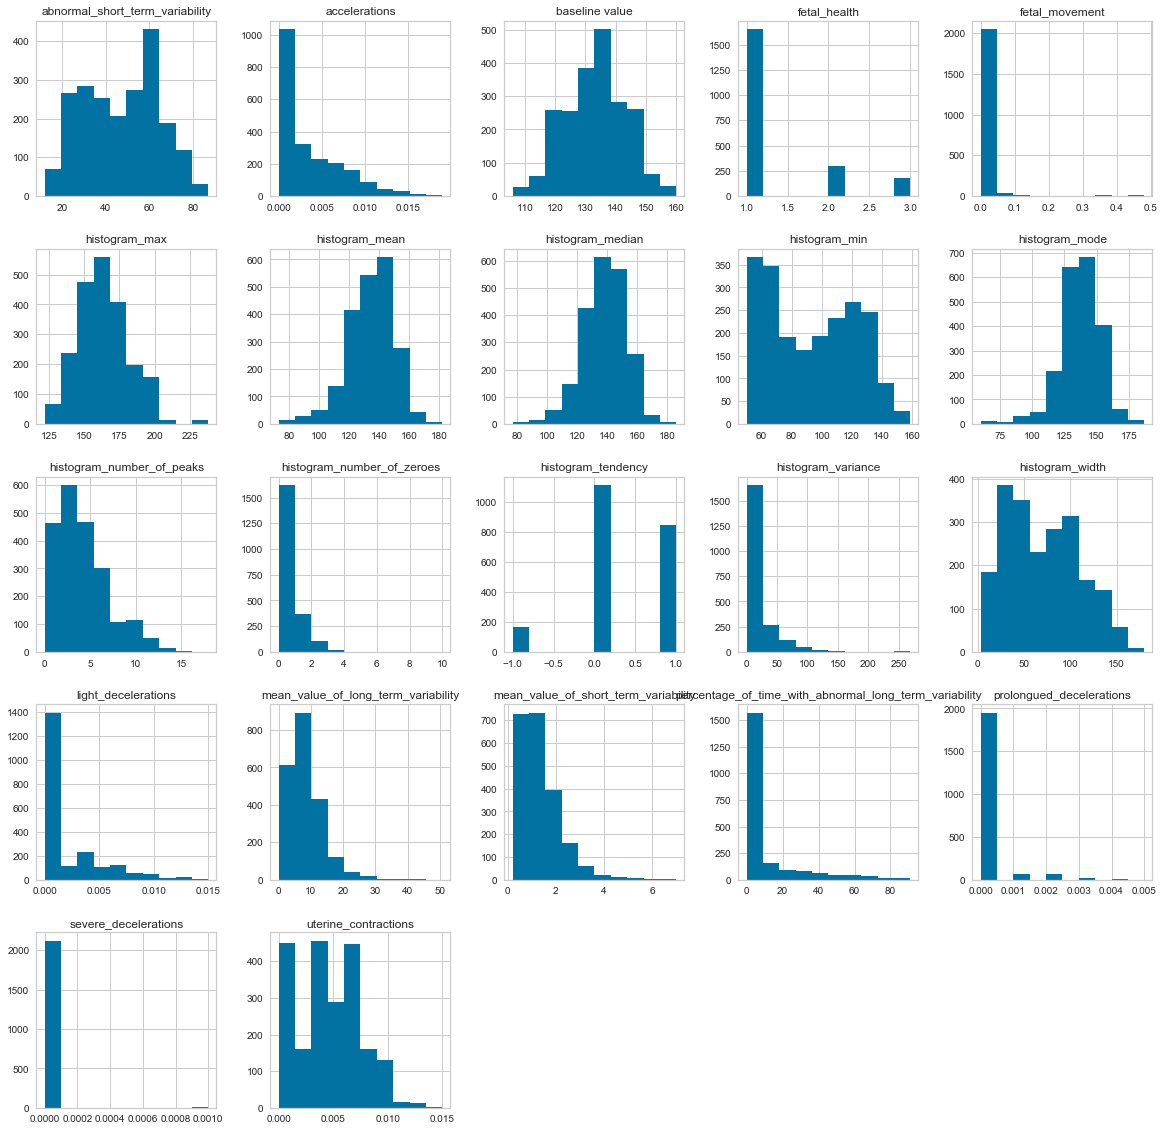

In [7]:
# Histogram to visualize data
df_visual_hist = df.hist(figsize = (20,20))

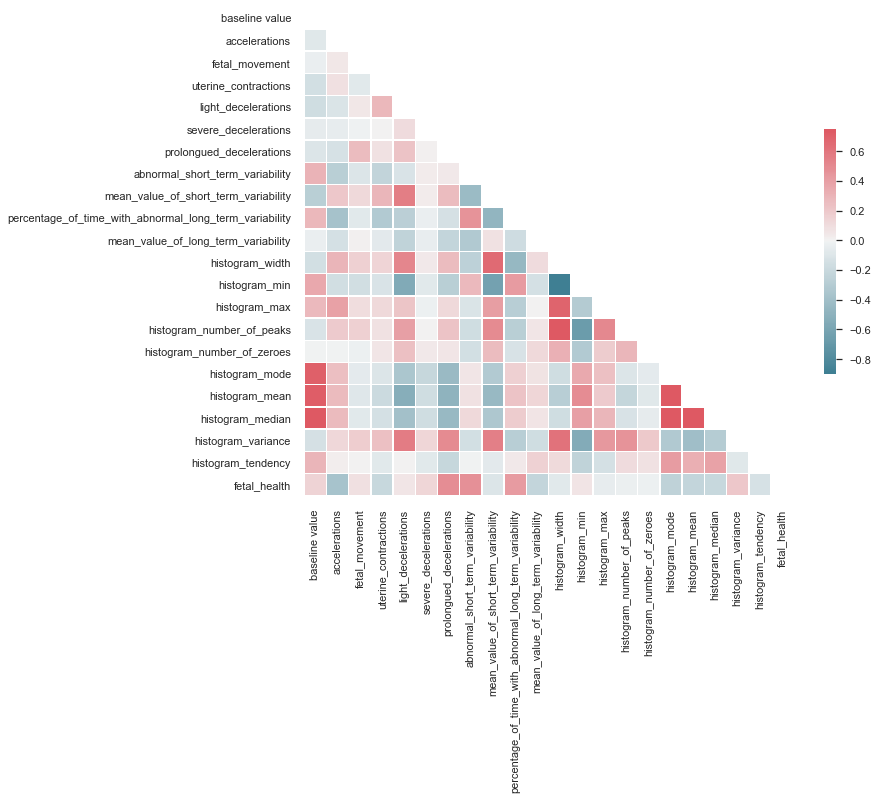

In [8]:
#Heatmap to visualize correlations
sns.set(style='white')
corr = df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5});

In [9]:
# Ranking of the correlations
corr_feature_ranking = corr['fetal_health'].sort_values(ascending=False).to_frame()
cm = sns.light_palette('r', as_cmap=True)
style = corr_feature_ranking.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


### Train/Test Split

In [10]:
X = df.drop(['fetal_health'], axis = 1)
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

### Scaling Data

In [11]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X.columns)

### Confusion Matrix

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

In [13]:
logreg = LogisticRegression(multi_class='multinomial', random_state=42)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

logreg_f1 = metrics.f1_score(y_test, logreg_preds, average='weighted')
logreg_recall = metrics.recall_score(y_test, logreg_preds, average='weighted')
logreg_acc = metrics.accuracy_score(y_test, logreg_preds)

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , logreg_f1)
print('Test Accuracy:' , logreg_acc)
print('Test Recall:' , logreg_recall)

Test F1: 0.8854706565258401
Test Accuracy: 0.8849765258215962
Test Recall: 0.8849765258215962


Confusion Matrix, without normalization
[[314  17   1]
 [ 17  40   2]
 [  3   9  23]]


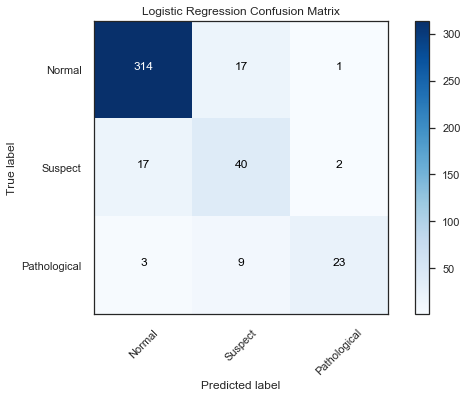

In [14]:
classes = ['Normal', 'Suspect', 'Pathological']
cm_lr = metrics.confusion_matrix(y_test, logreg_preds)
plot_confusion_matrix(cm_lr, classes=classes, title = 'Logistic Regression Confusion Matrix')

In [15]:
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.61      0.68      0.64        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.88       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.88      0.89       426



In [16]:
y_test.value_counts()

1.0    332
2.0     59
3.0     35
Name: fetal_health, dtype: int64

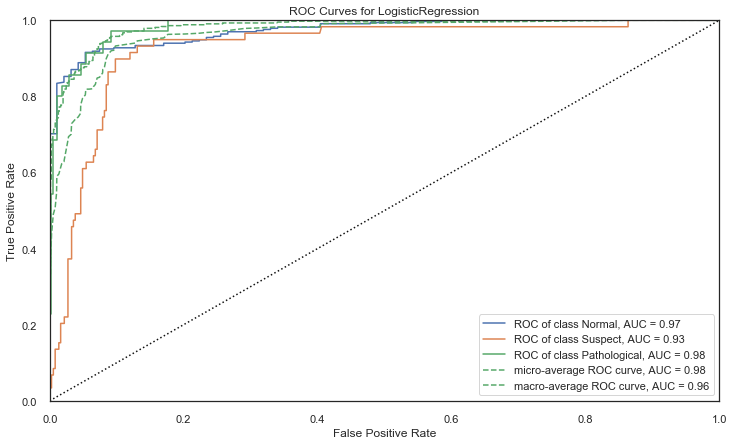

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(logreg, classes=classes, ax=ax)
roc.fit(X_train, y_train)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### Synthetic Minority Oversampling TEchnique (SMOTE) Logistic Regression

In [18]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [19]:
y_train_smote.value_counts()

2.0    1323
1.0    1323
3.0    1323
Name: fetal_health, dtype: int64

In [20]:
smote = LogisticRegression(multi_class='multinomial', random_state = 42).fit(X_train_smote, y_train_smote)

smote_preds = smote.predict(X_test)

# Checking Accuracy, F1, and Recall scores
print('Test Accuracy:' , accuracy_score(y_test, smote_preds))
# F1 score
print('Test F1:' , f1_score(y_test, smote_preds, average='weighted'))
# Recall
print('Test Recall:' , recall_score(y_test, smote_preds, average='weighted'))

Test Accuracy: 0.863849765258216
Test F1: 0.875375499774837
Test Recall: 0.863849765258216


Confusion Matrix, without normalization
[[293  35   4]
 [  4  47   8]
 [  0   7  28]]


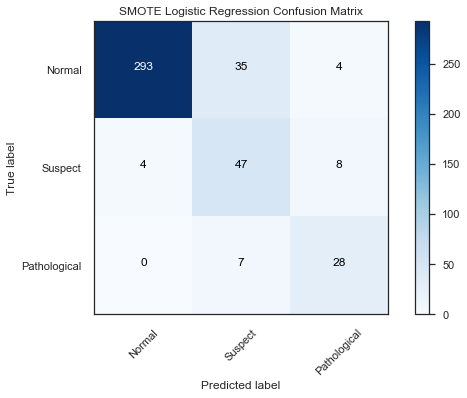

In [21]:
cm_lr_smote=metrics.confusion_matrix(y_test, smote_preds)
plot_confusion_matrix(cm_lr_smote, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE Logistic Regression Confusion Matrix')

In [22]:
print(classification_report(y_test, smote_preds))

              precision    recall  f1-score   support

         1.0       0.99      0.88      0.93       332
         2.0       0.53      0.80      0.64        59
         3.0       0.70      0.80      0.75        35

    accuracy                           0.86       426
   macro avg       0.74      0.83      0.77       426
weighted avg       0.90      0.86      0.88       426



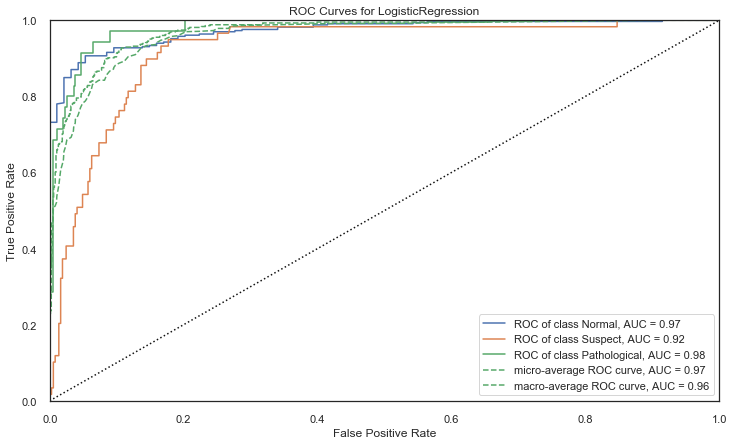

In [23]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(smote, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### Cross Validate SMOTE Logistic Regression

In [24]:
cv_method = StratifiedKFold(n_splits=3, random_state=42)

In [25]:
# Cross validate SMOTE Logistic Regression model
scores_lr = cross_val_score(logreg, X_train_smote, y_train_smote, cv =cv_method, scoring = 'accuracy')

print(f'Scores(Cross Validation) for Logistic Regression model:\n{scores_lr}')
print(f'CrossValMeans: {round(scores_lr.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_lr.std(), 3)}')

Scores(Cross Validation) for Logistic Regression model:
[0.87452759 0.89569161 0.89417989]
CrossValMeans: 0.888
CrossValStandard Deviation: 0.01


### GridCV - SMOTE Logistic Regression

In [26]:
#Creating Dictionary of Parameters to Tune
params_lr = {'tol': [0.0001,0.0002,0.0003],
            'C': [80, 100, 120, 140],
             'penalty':['l1', 'l2']
              }
estimator_cv = LogisticRegression(multi_class='multinomial', random_state = 42)

In [27]:
GridSearchCV_LR = GridSearchCV(estimator=estimator_cv, 
                                param_grid=params_lr, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1
                              )

In [28]:
# Fit model with train data
GridSearchCV_LR.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  57 out of  72 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [80, 100, 120, 140], 'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             verbose=1)

In [29]:
#Identifying Best Parameters 
print(GridSearchCV_LR.best_params_)
print(GridSearchCV_LR.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(GridSearchCV_LR.best_score_)

{'C': 100, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=100, multi_class='multinomial', random_state=42)
0.888888888888889


In [30]:
#Predicting Test Set
GridSearchCV_LR_preds = GridSearchCV_LR.best_estimator_.predict(X_test)

# Checking Accuracy, F1, Recall Scores
print('Test Accuracy:' , accuracy_score(y_test, GridSearchCV_LR_preds))
# F1 score
print('Test F1:' , f1_score(y_test, GridSearchCV_LR_preds, average='weighted'))
# Recall
print('Test Recall:' , recall_score(y_test, GridSearchCV_LR_preds, average='weighted'))

Test Accuracy: 0.863849765258216
Test F1: 0.8755366548238429
Test Recall: 0.863849765258216


Confusion Matrix, without normalization
[[293  34   5]
 [  3  47   9]
 [  0   7  28]]


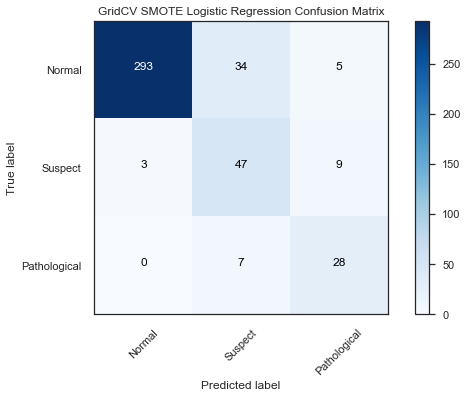

In [31]:
cm_lr_smote_cv=metrics.confusion_matrix(y_test,GridSearchCV_LR_preds)
plot_confusion_matrix(cm_lr_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='GridCV SMOTE Logistic Regression Confusion Matrix')

In [32]:
print(classification_report(y_test, GridSearchCV_LR_preds))

              precision    recall  f1-score   support

         1.0       0.99      0.88      0.93       332
         2.0       0.53      0.80      0.64        59
         3.0       0.67      0.80      0.73        35

    accuracy                           0.86       426
   macro avg       0.73      0.83      0.77       426
weighted avg       0.90      0.86      0.88       426



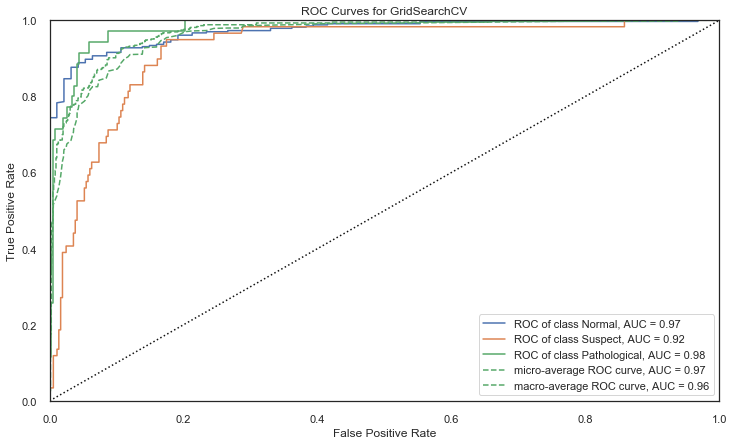

In [33]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(GridSearchCV_LR, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### SMOTE KNN

In [34]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train_smote, y_train_smote)
knn_preds = knn.predict(X_test)

knn_f1 = metrics.f1_score(y_test, knn_preds, average='weighted')
knn_acc = metrics.accuracy_score(y_test, knn_preds)
knn_recall = metrics.recall_score(y_test, knn_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , knn_f1)
print('Test Accuracy:' , knn_acc)
print('Test Recall:' , knn_recall)

Test F1: 0.886383737594418
Test Accuracy: 0.8802816901408451
Test Recall: 0.8802816901408451


Confusion Matrix, without normalization
[[303  26   3]
 [ 10  43   6]
 [  0   6  29]]


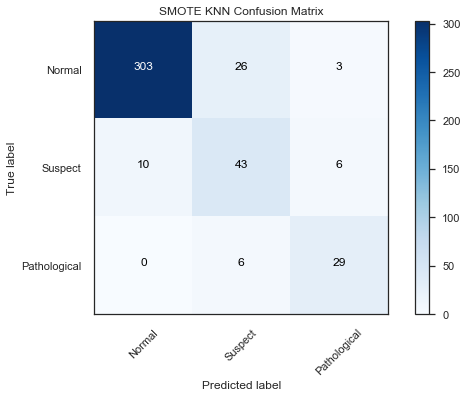

In [35]:
cm_knn=metrics.confusion_matrix(y_test, knn_preds)
plot_confusion_matrix(cm_knn, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE KNN Confusion Matrix')

In [36]:
# Cross validate SMOTE K-Nearest Neighbors model
scores_knn = cross_val_score(knn, X_train_smote, y_train_smote, cv = cv_method, n_jobs=-1, scoring="accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.95313681 0.96674225 0.96900983]
CrossValMeans: 0.963
CrossValStandard Deviation: 0.007


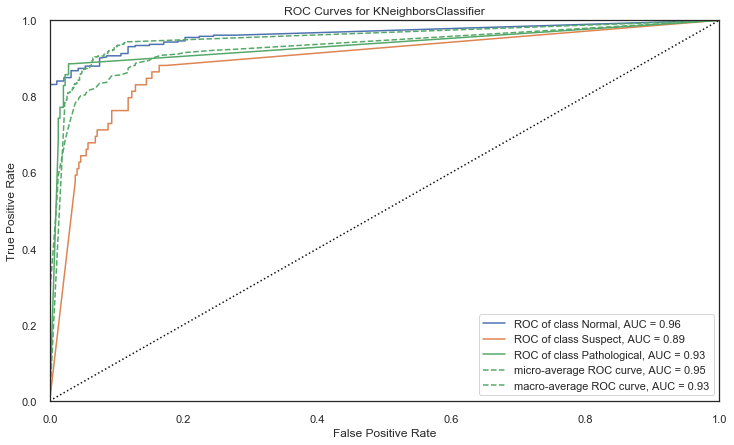

In [37]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(knn, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### GridCV - SMOTE KNN

In [38]:
params_knn = {"n_neighbors": [3,5,11,15],
              "p": [1,2], 
              'metric': ['euclidean', 'manhattan']
             }

In [39]:
GridSearchCV_knn = GridSearchCV(estimator=knn, 
                                param_grid=params_knn, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                )

In [40]:
# Fit model with train data
GridSearchCV_knn.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=KNeighborsClassifier(weights='distance'), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 15], 'p': [1, 2]},
             verbose=1)

In [41]:
#Identifying Best Parameters 
print(GridSearchCV_knn.best_params_)
print(GridSearchCV_knn.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(GridSearchCV_knn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance')
0.9705215419501134


In [42]:
#Predicting Test Set
GridSearchCV_knn_preds = GridSearchCV_knn.best_estimator_.predict(X_test)

# Checking Accuracy, F1, Recall Scores
print('Test Accuracy:' , accuracy_score(y_test, GridSearchCV_knn_preds))
# F1 score
print('Test F1:' , f1_score(y_test, GridSearchCV_knn_preds, average='weighted'))
# Recall
print('Test Recall:' , recall_score(y_test, GridSearchCV_knn_preds, average='weighted'))

Test Accuracy: 0.8896713615023474
Test F1: 0.8954421426322698
Test Recall: 0.8896713615023474


Confusion Matrix, without normalization
[[304  25   3]
 [  9  46   4]
 [  0   6  29]]


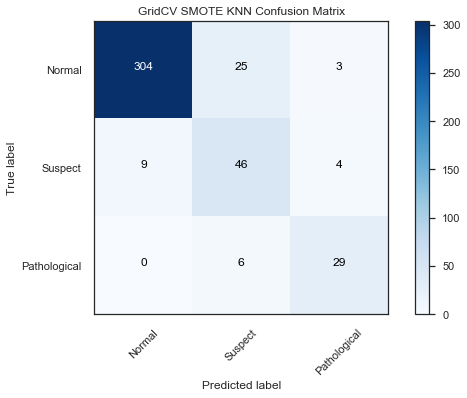

In [43]:
cm_knn_smote_cv=metrics.confusion_matrix(y_test,GridSearchCV_knn_preds)
plot_confusion_matrix(cm_knn_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='GridCV SMOTE KNN Confusion Matrix')

In [44]:
print(classification_report(y_test, GridSearchCV_knn_preds))

              precision    recall  f1-score   support

         1.0       0.97      0.92      0.94       332
         2.0       0.60      0.78      0.68        59
         3.0       0.81      0.83      0.82        35

    accuracy                           0.89       426
   macro avg       0.79      0.84      0.81       426
weighted avg       0.91      0.89      0.90       426



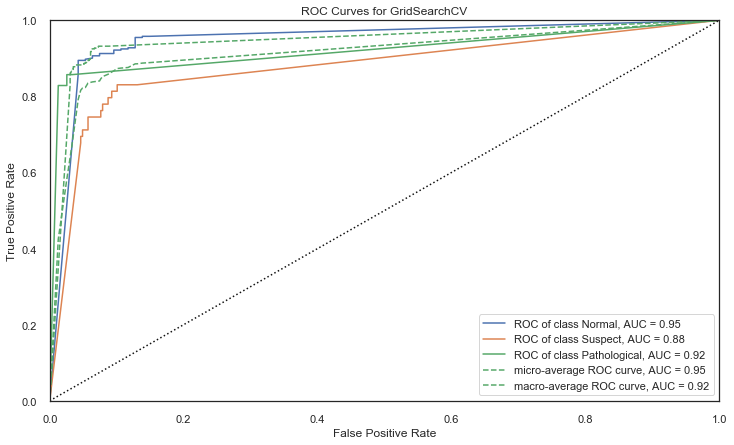

In [45]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(GridSearchCV_knn, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### SMOTE Decision Tree

In [46]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_smote, y_train_smote)
dt_preds = dt.predict(X_test)

dt_f1 = metrics.f1_score(y_test, dt_preds, average='weighted')
dt_acc = metrics.accuracy_score(y_test, dt_preds)
dt_recall = metrics.recall_score(y_test, dt_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , dt_f1)
print('Test Accuracy:' , dt_acc)
print('Test Recall:' , dt_recall)

Test F1: 0.8992780063812981
Test Accuracy: 0.903755868544601
Test Recall: 0.903755868544601


Confusion Matrix, without normalization
[[320  11   1]
 [ 21  34   4]
 [  3   1  31]]


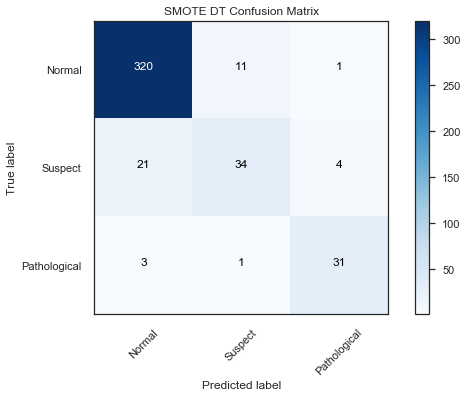

In [47]:
cm_dt=metrics.confusion_matrix(y_test,dt_preds)
plot_confusion_matrix(cm_dt, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE DT Confusion Matrix')

In [48]:
# Cross validate DT model
scores_dt = cross_val_score(dt, X_train_smote, y_train_smote, cv = cv_method, n_jobs=-1, scoring="accuracy")

print(f"Scores(Cross validate) for Decision Tree model:\n{scores_dt}")
print(f"CrossValMeans: {round(scores_dt.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_dt.std(), 3)}")

Scores(Cross validate) for Decision Tree model:
[0.93953137 0.96598639 0.96523054]
CrossValMeans: 0.957
CrossValStandard Deviation: 0.012


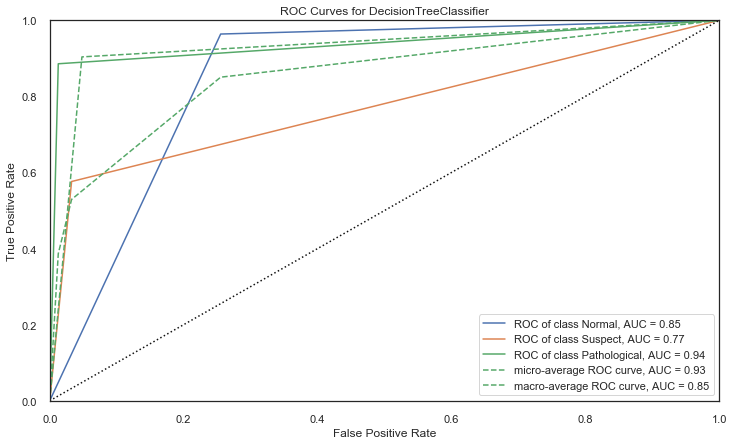

In [49]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(dt, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### SMOTE RF

In [50]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators = 100)
rf.fit(X_train_smote, y_train_smote)
rf_preds = rf.predict(X_test)

rf_f1 = metrics.f1_score(y_test, rf_preds, average='weighted')
rf_acc = metrics.accuracy_score(y_test, rf_preds)
rf_recall = metrics.recall_score(y_test, rf_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , rf_f1)
print('Test Accuracy:' , rf_acc)
print('Test Recall:' , rf_recall)

Test F1: 0.9204145371276556
Test Accuracy: 0.92018779342723
Test Recall: 0.92018779342723


Confusion Matrix, without normalization
[[317  13   2]
 [ 11  44   4]
 [  2   2  31]]


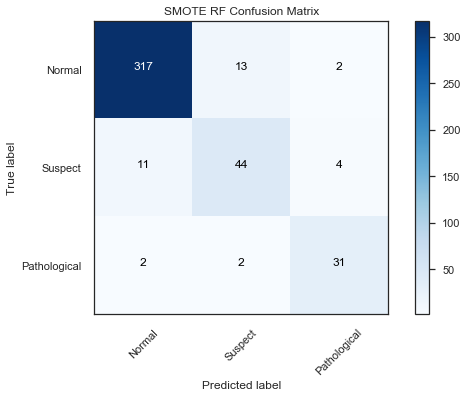

In [51]:
cm_rf=metrics.confusion_matrix(y_test,rf_preds)
plot_confusion_matrix(cm_rf, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE RF Confusion Matrix')

In [52]:
# Cross validate SMOTE RF model
scores_rf = cross_val_score(rf, X_train_smote, y_train_smote, cv = cv_method, n_jobs=-1, scoring="accuracy")

print(f"Scores(Cross validate) for Random Forest model:\n{scores_rf}")
print(f"CrossValMeans: {round(scores_rf.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_rf.std(), 3)}")

Scores(Cross validate) for Random Forest model:
[0.96069539 0.9856387  0.9856387 ]
CrossValMeans: 0.977
CrossValStandard Deviation: 0.012


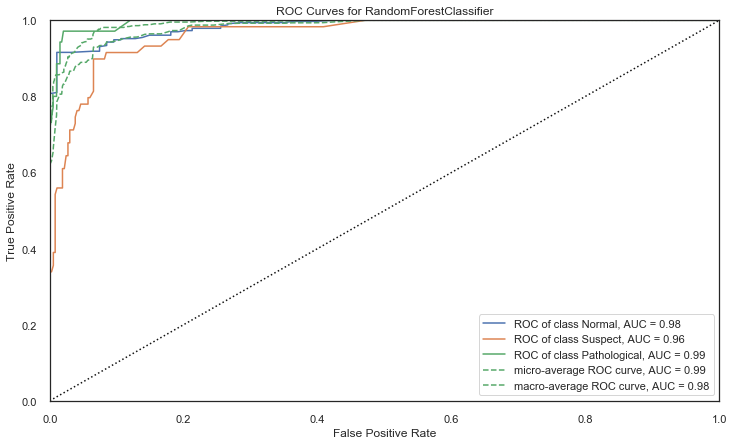

In [53]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(rf, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### SMOTE GridCV - RF

In [54]:
rf_params = { 
    'n_estimators': [75, 100, 125],
    'max_features': [.25, .35, 'auto'],
    'max_depth' : [7, 9, 11],
    'criterion' : ['entropy']
}

In [55]:
GridSearchCV_rf = GridSearchCV(estimator=rf, 
                           param_grid=rf_params, 
                           cv=cv_method, 
                           scoring='accuracy', 
                           verbose=1, 
                           n_jobs=-1
                          )

In [56]:
# Fit model with train data
GridSearchCV_rf.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   10.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 9, 11],
                         'max_features': [0.25, 0.35, 'auto'],
                         'n_estimators': [75, 100, 125]},
             scoring='accuracy', verbose=1)

In [57]:
#Identifying Best Parameters 
print(GridSearchCV_rf.best_params_)
print(GridSearchCV_rf.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(GridSearchCV_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 0.25, 'n_estimators': 100}
RandomForestClassifier(criterion='entropy', max_depth=11, max_features=0.25,
                       n_jobs=-1, random_state=42)
0.9768203577727387


In [58]:
#Predicting Test Set
GridSearchCV_rf_preds = GridSearchCV_rf.best_estimator_.predict(X_test)

# Checking Accuracy, F1, Recall Scores
print('Test Accuracy:' , accuracy_score(y_test, GridSearchCV_rf_preds))
# F1 score
print('Test F1:' , f1_score(y_test, GridSearchCV_rf_preds, average='weighted'))
# Recall
print('Test Recall:' , recall_score(y_test, GridSearchCV_rf_preds, average='weighted'))

Test Accuracy: 0.9248826291079812
Test F1: 0.9254920092948263
Test Recall: 0.9248826291079812


Confusion Matrix, without normalization
[[316  14   2]
 [ 10  46   3]
 [  2   1  32]]


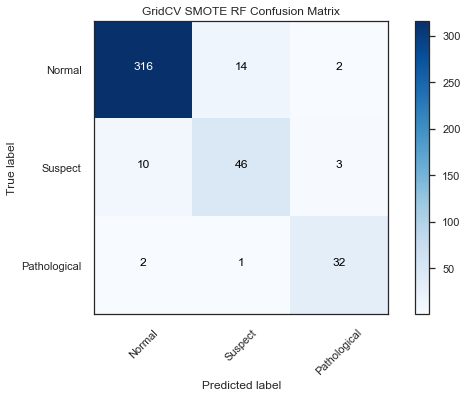

In [59]:
cm_rf_smote_cv=metrics.confusion_matrix(y_test,GridSearchCV_rf_preds)
plot_confusion_matrix(cm_rf_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='GridCV SMOTE RF Confusion Matrix')

In [60]:
print(classification_report(y_test, GridSearchCV_rf_preds))

              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       332
         2.0       0.75      0.78      0.77        59
         3.0       0.86      0.91      0.89        35

    accuracy                           0.92       426
   macro avg       0.86      0.88      0.87       426
weighted avg       0.93      0.92      0.93       426



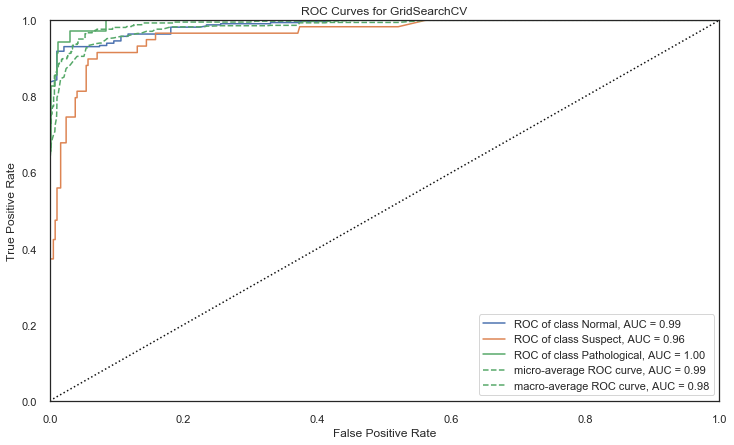

In [61]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(GridSearchCV_rf, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### SMOTE XGBoost

In [62]:
xgb = xgb.XGBClassifier(random_state=42, 
                        n_jobs=-1, 
                        n_estimators=100,
                        learning_rate=0.01)
xgb.fit(X_train_smote, y_train_smote)
xgb_preds = xgb.predict(X_test)

xgb_f1 = metrics.f1_score(y_test, xgb_preds, average='weighted')
xgb_acc = metrics.accuracy_score(y_test, xgb_preds)
xgb_recall = metrics.recall_score(y_test, xgb_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , xgb_f1)
print('Test Accuracy:' , xgb_acc)
print('Test Recall:' , xgb_recall)

Test F1: 0.8758140406652282
Test Accuracy: 0.8685446009389671
Test Recall: 0.8685446009389671


Confusion Matrix, without normalization
[[291  34   7]
 [ 10  47   2]
 [  2   1  32]]


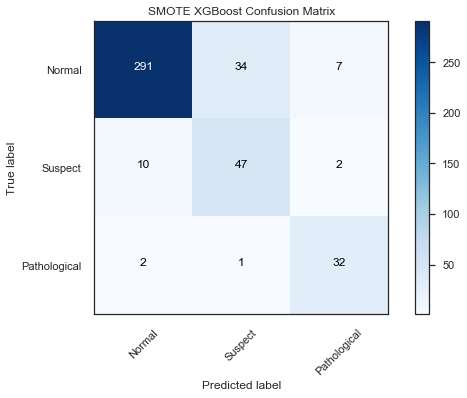

In [63]:
cm_xgb_smote_cv=metrics.confusion_matrix(y_test, xgb_preds)
plot_confusion_matrix(cm_xgb_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE XGBoost Confusion Matrix')

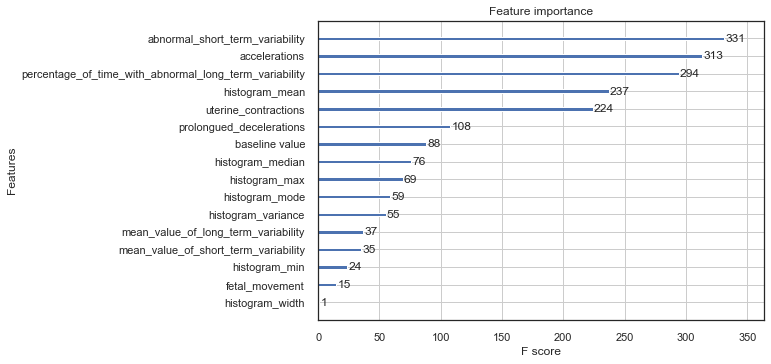

In [64]:
plot_importance(xgb)
plt.show()

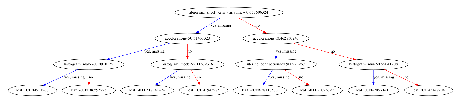

In [65]:
plot_tree(xgb)
plt.show()

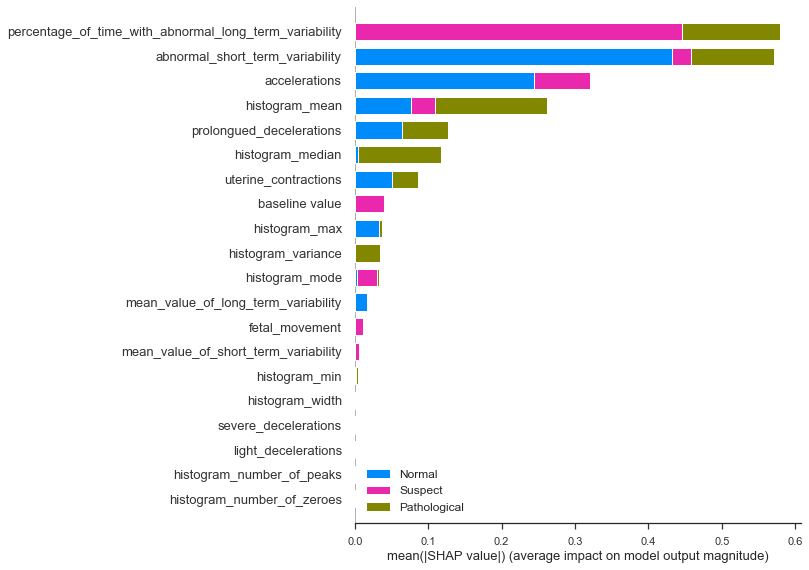

In [66]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

classes=['Normal', 'Suspect', 'Pathological']

shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=classes)

### SMOTE ADABoost

In [67]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.01, random_state=42)
ada.fit(X_train_smote, y_train_smote)
ada_preds = ada.predict(X_test)

ada_f1 = metrics.f1_score(y_test, ada_preds, average='weighted')
ada_acc = metrics.accuracy_score(y_test, ada_preds)
ada_recall = metrics.recall_score(y_test, ada_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , ada_f1)
print('Test Accuracy:' , ada_acc)
print('Test Recall:' , ada_recall)

Test F1: 0.9166090526199463
Test Accuracy: 0.9178403755868545
Test Recall: 0.9178403755868545


Confusion Matrix, without normalization
[[320  11   1]
 [ 13  41   5]
 [  3   2  30]]


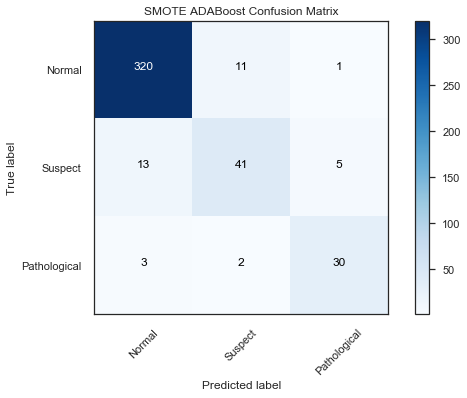

In [68]:
cm_ada_smote_cv=metrics.confusion_matrix(y_test, ada_preds)
plot_confusion_matrix(cm_ada_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE ADABoost Confusion Matrix')

In [69]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       332
         2.0       0.76      0.69      0.73        59
         3.0       0.83      0.86      0.85        35

    accuracy                           0.92       426
   macro avg       0.85      0.84      0.84       426
weighted avg       0.92      0.92      0.92       426



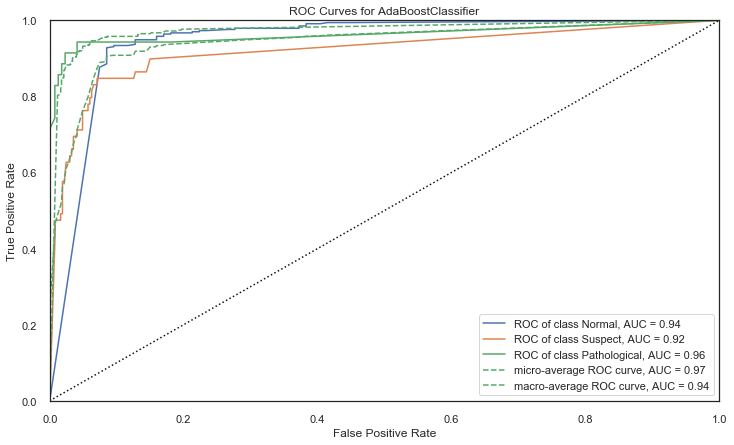

In [70]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(ada, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### SMOTE VotingClassifier

In [75]:
vc = VotingClassifier(estimators=[('Base_LR', logreg), ('SMOTE_LR', smote), 
                                  ('GridSearchCV_SMOTE_LR', GridSearchCV_LR),
                                  ('SMOTE_KNN', knn), ('GridSearchCV_SMOTE_KNN', GridSearchCV_knn), 
                                  ('SMOTE_DT', dt), ('SMOTE_RF', rf), ('GridSearchCV_SMOTE_RF', GridSearchCV_rf),
                                  ('SMOTE_XGBoost', xgb), ('SMOTE_ADABoost', ada)], 
                      voting='soft',
                      n_jobs=-1)
vc.fit(X_train_smote, y_train_smote)
vc_preds = vc.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds, average='weighted')
vc_acc = metrics.accuracy_score(y_test, vc_preds)
vc_recall = metrics.recall_score(y_test, vc_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , vc_f1)
print('Test Accuracy:' , vc_acc)
print('Test Recall:' , vc_recall)

Test F1: 0.9220038236432635
Test Accuracy: 0.92018779342723
Test Recall: 0.92018779342723


Confusion Matrix, without normalization
[[314  16   2]
 [  9  46   4]
 [  0   3  32]]


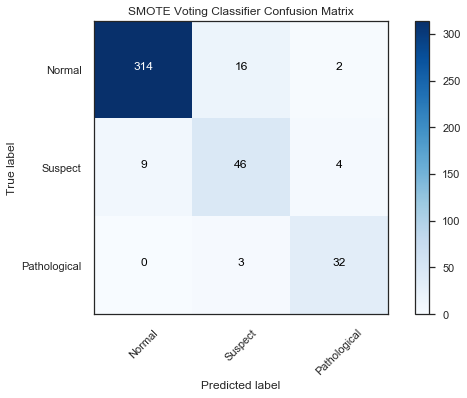

In [76]:
cm_vc_smote_cv=metrics.confusion_matrix(y_test, vc_preds)
plot_confusion_matrix(cm_vc_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='SMOTE Voting Classifier Confusion Matrix')

In [77]:
print(classification_report(y_test, vc_preds))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       332
         2.0       0.71      0.78      0.74        59
         3.0       0.84      0.91      0.88        35

    accuracy                           0.92       426
   macro avg       0.84      0.88      0.86       426
weighted avg       0.92      0.92      0.92       426



### SMOTE GridCV - VotingClassifier

In [79]:
vc_params = {'weights': [[1,2,2,2,2,1,1,1,1,1], [1,3,3,3,3,1,1,1,1,1],
                         [0.5,1,1,1,1,0.5,0.5,0.5,0.5,0.5], [0.75,1,1,1,1,0.75,0.75,0.75,0.75,0.75]],
            'voting':['soft']}

In [82]:
GridSearchCV_vc = GridSearchCV(estimator=vc,
                               param_grid=vc_params, 
                               cv=cv_method, 
                               scoring='accuracy', 
                               verbose=1,
                               n_jobs=-1)

In [83]:
GridSearchCV_vc.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  2.0min remaining:   24.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=VotingClassifier(estimators=[('Base_LR',
                                                     LogisticRegression(multi_class='multinomial',
                                                                        random_state=42)),
                                                    ('SMOTE_LR',
                                                     LogisticRegression(multi_class='multinomial',
                                                                        random_state=42)),
                                                    ('GridSearchCV_SMOTE_LR',
                                                     GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuf...
                                                     AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                                        learning_rate=

In [84]:
#Identifying Best Parameters 
print(GridSearchCV_vc.best_params_)
print(GridSearchCV_vc.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(GridSearchCV_vc.best_score_)

{'voting': 'soft', 'weights': [0.75, 1, 1, 1, 1, 0.75, 0.75, 0.75, 0.75, 0.75]}
VotingClassifier(estimators=[('Base_LR',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=42)),
                             ('SMOTE_LR',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=42)),
                             ('GridSearchCV_SMOTE_LR',
                              GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                                           estimator=LogisticRegression(multi_class='multinomial',
                                                                        random_state=42),
                                           n...
                                           scoring='accuracy', verbose=1)),
                             ('SMOTE_XGBoost',
                           

In [85]:
#Predicting Test Set
GridSearchCV_vc_preds = GridSearchCV_vc.best_estimator_.predict(X_test)

# Checking Accuracy, F1, Recall Scores
print('Test Accuracy:' , accuracy_score(y_test, GridSearchCV_vc_preds))
# F1 score
print('Test F1:' , f1_score(y_test, GridSearchCV_vc_preds, average='weighted'))
# Recall
print('Test Recall:' , recall_score(y_test, GridSearchCV_vc_preds, average='weighted'))

Test Accuracy: 0.92018779342723
Test F1: 0.9221821946664437
Test Recall: 0.92018779342723


Confusion Matrix, without normalization
[[314  17   1]
 [  9  46   4]
 [  0   3  32]]


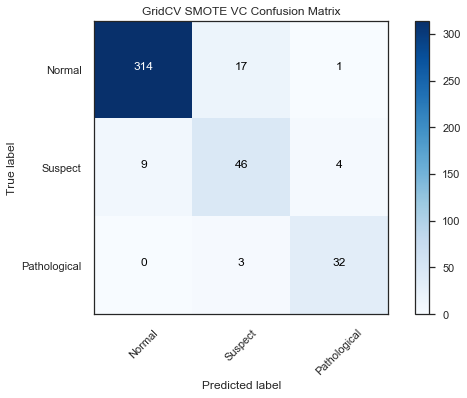

In [86]:
cm_gcv_vc_smote_cv=metrics.confusion_matrix(y_test,GridSearchCV_vc_preds)
plot_confusion_matrix(cm_gcv_vc_smote_cv, classes=['Normal', 'Suspect', 'Pathological'], 
                      title='GridCV SMOTE VC Confusion Matrix')

In [87]:
print(classification_report(y_test, GridSearchCV_vc_preds))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       332
         2.0       0.70      0.78      0.74        59
         3.0       0.86      0.91      0.89        35

    accuracy                           0.92       426
   macro avg       0.84      0.88      0.86       426
weighted avg       0.93      0.92      0.92       426



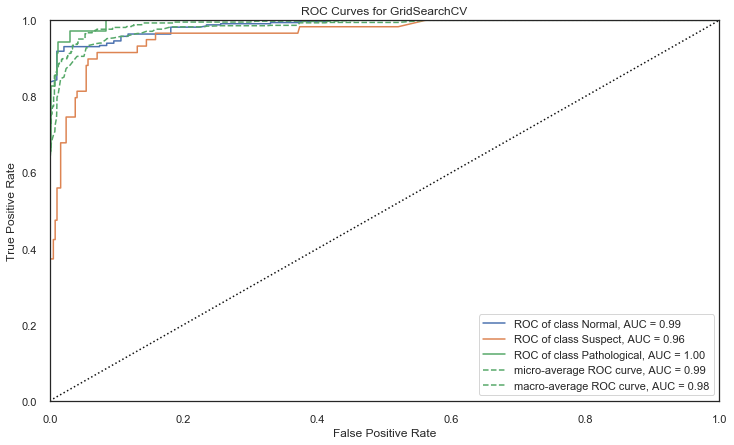

In [61]:
fig, ax = plt.subplots(figsize=(12, 7))
roc = ROCAUC(GridSearchCV_vc_preds, classes=classes, ax=ax)
roc.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

### Model Comparison

#### Accuracy Score

In [106]:
acc_results = pd.DataFrame({
                        'Model': ['Baseline Logistic Regression', 'SMOTE Logistic Regression',
                                  'GridSearchCV SMOTE Logistic Regression','SMOTE KNN', 
                                  'GridSearchCV SMOTE KNN', 'SMOTE Decision Tree',
                                  'SMOTE Random Forest','GridSearchCV SMOTE Random Forest',
                                  'SMOTE XGBoost', 'SMOTE ADABoost', 'SMOTE Voting Classifier',
                                  'GridSearchCV SMOTE Voting Classifier'
                                 ],
                        'Accuracy Score': [logreg_acc, accuracy_score(y_test, smote_preds),
                                     accuracy_score(y_test, GridSearchCV_LR_preds),
                                     knn_acc, accuracy_score(y_test, GridSearchCV_knn_preds),
                                     dt_acc, rf_acc, accuracy_score(y_test, GridSearchCV_rf_preds),
                                     xgb_acc, ada_acc,vc_acc,
                                     accuracy_score(y_test, GridSearchCV_vc_preds) 
                                    ]
                        })
acc_result_df = acc_results.sort_values(by="Accuracy Score", ascending=False)
acc_result_df = acc_result_df.set_index("Accuracy Score")
acc_result_df

,Model
Accuracy Score,
0.924883,GridSearchCV SMOTE Random Forest
0.920188,SMOTE Random Forest
0.920188,SMOTE Voting Classifier
0.920188,GridSearchCV SMOTE Voting Classifier
0.917840,SMOTE ADABoost
0.903756,SMOTE Decision Tree
0.889671,GridSearchCV SMOTE KNN
0.884977,Baseline Logistic Regression
0.880282,SMOTE KNN


#### Recall Score

In [107]:
recall_results = pd.DataFrame({
                        'Model': ['Baseline Logistic Regression', 'SMOTE Logistic Regression',
                                  'GridSearchCV SMOTE Logistic Regression','SMOTE KNN', 
                                  'GridSearchCV SMOTE KNN', 'SMOTE Decision Tree',
                                  'SMOTE Random Forest','GridSearchCV SMOTE Random Forest',
                                  'SMOTE XGBoost', 'SMOTE ADABoost', 'SMOTE Voting Classifier',
                                  'GridSearchCV SMOTE Voting Classifier'
                                 ],
                        'Recall Score': [logreg_recall, recall_score(y_test, smote_preds, average='weighted'),
                                     recall_score(y_test, GridSearchCV_LR_preds, average='weighted'),
                                     knn_recall,recall_score(y_test, GridSearchCV_knn_preds, average='weighted'),
                                     dt_recall, rf_recall, 
                                     recall_score(y_test, GridSearchCV_rf_preds, average='weighted'),
                                     xgb_recall, ada_recall, vc_recall,
                                     recall_score(y_test, GridSearchCV_vc_preds, average='weighted'), 
                                     
                                    ]
                        })
recall_result_df = recall_results.sort_values(by="Recall Score", ascending=False)
recall_result_df = recall_result_df.set_index("Recall Score")
recall_result_df

,Model
Recall Score,
0.924883,GridSearchCV SMOTE Random Forest
0.920188,SMOTE Random Forest
0.920188,SMOTE Voting Classifier
0.920188,GridSearchCV SMOTE Voting Classifier
0.917840,SMOTE ADABoost
0.903756,SMOTE Decision Tree
0.889671,GridSearchCV SMOTE KNN
0.884977,Baseline Logistic Regression
0.880282,SMOTE KNN


#### F1 Score

In [108]:
f1_results = pd.DataFrame({
                        'Model': ['Baseline Logistic Regression', 'SMOTE Logistic Regression',
                                  'GridSearchCV SMOTE Logistic Regression','SMOTE KNN', 
                                  'GridSearchCV SMOTE KNN', 'SMOTE Decision Tree',
                                  'SMOTE Random Forest','GridSearchCV SMOTE Random Forest',
                                  'SMOTE XGBoost', 'SMOTE ADABoost', 'SMOTE Voting Classifier',
                                  'GridSearchCV SMOTE Voting Classifier'
                                 ],
                        'F1 Score': [logreg_f1, f1_score(y_test, smote_preds, average='weighted'),
                                     f1_score(y_test, GridSearchCV_LR_preds, average='weighted'),
                                     knn_f1,f1_score(y_test, GridSearchCV_knn_preds, average='weighted'),
                                     dt_f1, rf_f1, f1_score(y_test, GridSearchCV_rf_preds, average='weighted'),
                                     xgb_f1, ada_f1,vc_f1,
                                     f1_score(y_test, GridSearchCV_vc_preds, average='weighted'), 
                                     
                                    ]
                        })
f1_result_df = f1_results.sort_values(by="F1 Score", ascending=False)
f1_result_df = f1_result_df.set_index("F1 Score")
f1_result_df

,Model
F1 Score,
0.925492,GridSearchCV SMOTE Random Forest
0.922182,GridSearchCV SMOTE Voting Classifier
0.922004,SMOTE Voting Classifier
0.920415,SMOTE Random Forest
0.916609,SMOTE ADABoost
0.899278,SMOTE Decision Tree
0.895442,GridSearchCV SMOTE KNN
0.886384,SMOTE KNN
0.885471,Baseline Logistic Regression
